# Statistics and Statistical Models

## Descriptive Statistics

Creating a Panda dataframe from SQL database and importing visualization library, Seaborn

In [94]:
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns


# Specify the path to the .db file
db_path = "/Users/kelechiagomuo/Documents/Python/poke_api/pokemon.db"

# Establish a connection to the SQLite database
conn = sqlite3.connect(db_path)

# Write your SQL query to select data from the desired table(s)
query = "SELECT * FROM pokemon_tbl"

# Use pandas.read_sql() to execute the query and retrieve the data as a DataFrame
df = pd.read_sql(query, conn)

# Close the database connection
conn.close()


Inspect the dataframe to make sure it is reading from the table correctly

In [95]:
# View the first 5 rows of the DataFrame
df.head()

,name,id,height,base_experience,pokemon_species_id,weight,hp,attack,defense,special-attack,...,is_legendary,is_mythical,capture_rate,base_happiness,hatch_counter,growth_rate,generation_name,habitat_name,type_name_1,type_name_2
0,bulbasaur,1,7,64,1,69,45,49,49,65,...,False,False,45,50,20,medium-slow,generation-i,grassland,grass,poison
1,ivysaur,2,10,142,2,130,60,62,63,80,...,False,False,45,50,20,medium-slow,generation-i,grassland,grass,poison
2,venusaur,3,20,263,3,1000,80,82,83,100,...,False,False,45,50,20,medium-slow,generation-i,grassland,grass,poison
3,charmander,4,6,62,4,85,39,52,43,60,...,False,False,45,50,20,medium-slow,generation-i,mountain,fire,
4,charmeleon,5,11,142,5,190,58,64,58,80,...,False,False,45,50,20,medium-slow,generation-i,mountain,fire,


In [96]:
### some data cleaning of null values
# Fill empty and non-numeric values with NaN
df['base_experience'] = df['base_experience'].replace('', np.nan).astype(float)

# Replace missing values with zeros in an integer column
df['base_experience'] = df['base_experience'].fillna(0).astype(int)

# Change base_experience datatype to integer
df['base_experience'] = df['base_experience'].astype(int)

Generate summary statistics of all numerical columns

In [97]:
print(df.describe())

                 id       height  base_experience  pokemon_species_id  \
count   1279.000000  1279.000000      1279.000000         1279.000000   
mean    2545.263487    20.560594       141.964816          498.024238   
std     3946.023359    54.637581        95.509561          300.223688   
min        1.000000     1.000000         0.000000            1.000000   
25%      320.500000     5.000000        61.000000          229.000000   
50%      640.000000    10.000000       151.000000          501.000000   
75%      959.500000    16.000000       184.000000          764.500000   
max    10271.000000  1000.000000       635.000000         1008.000000   

             weight           hp       attack      defense  special-attack  \
count   1279.000000  1279.000000  1279.000000  1279.000000     1279.000000   
mean     977.837373    70.942924    81.405786    74.842846       73.317435   
std     1979.579636    26.811503    31.824740    30.470327       32.437385   
min        0.000000     1.0000

Create visualization using Seaborn to check distribution of HP stat

[Text(0.5, 1.0, 'Distribution of HP Stat')]

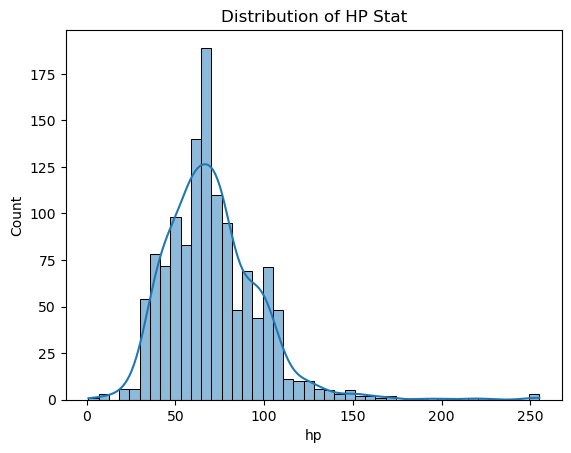

In [98]:
# Plot the distribution of the HP column using Seaborn
hp_plt = sns.histplot(df['hp'], kde=True)  # Enable kernel density estimation (KDE) for smoother curve, or use bins=# if you want to create the bins yourself

# Modify the plot lables
hp_plt.set(title='Distribution of HP Stat')

Feel free to create visualizations of any other key stats

## Linear Regression

See if there is a correlation to a Pokemon's base experience and the sum of its base stats.

First, create a new column in the dataframe that is a sum of all base stats (hp, attack, defense, etc.)

In [99]:
# Create new column for base stats, 'axis=1' is used to calculate the sums across each row
df['base_stats'] = df[['hp', 'attack', 'defense', 'special-attack', 'special-defense', 'speed']].sum(axis=1)


In [100]:
df['base_stats'] = df['base_stats'].astype(int)
df['base_experience'] = df['base_experience'].astype(int)

Now check out the summary statistics for the new "base_stats" column

In [101]:
column_stats = df['base_stats'].describe()
print(column_stats)

count    1279.000000
mean      444.049257
std       119.924448
min       175.000000
25%       334.500000
50%       468.000000
75%       520.000000
max      1125.000000
Name: base_stats, dtype: float64


Now calculate and print out the linear regression. 

In [102]:
from scipy.stats import linregress

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(df['base_experience'], df['base_stats'])

# Print the regression results
print("Slope:", slope)
print("Intercept:", intercept)
print("Correlation Coefficient:", r_value)
print("R-squared:", r_value ** 2)
print("p-value:", p_value)
print("Standard Error:", std_err)

Slope: 0.8575790625036142
Intercept: 322.3032031931441
Correlation Coefficient: 0.6829883420116176
R-squared: 0.46647307532377835
p-value: 2.010400751066261e-176
Standard Error: 0.02566513780928531


Now, visualize this linear regression

Text(0.05, 0.95, 'Correlation: 0.68')

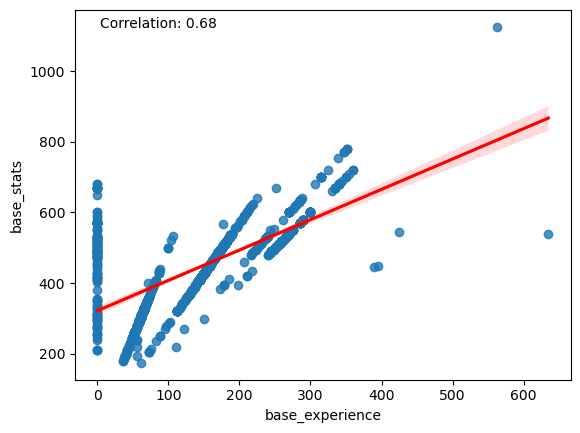

In [103]:
import matplotlib.pyplot as plt

# Create a scatter plot with regression line
sns.regplot(x='base_experience', y='base_stats', data=df, line_kws={'color': 'red'})
plt.annotate(f"Correlation: {df['base_experience'].corr(df['base_stats']):.2f}", xy=(0.05, 0.95), xycoords='axes fraction')

Feel free to repeat this exercise with Catch Rate, Growth Rate, Hatch Rate, etc.